In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('C:/Users/Jillian/Desktop/Thinkful Data Files/BlackFriday.csv')

In [49]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [51]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [52]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [53]:
df = df.fillna(0)
#df = df.dropna()

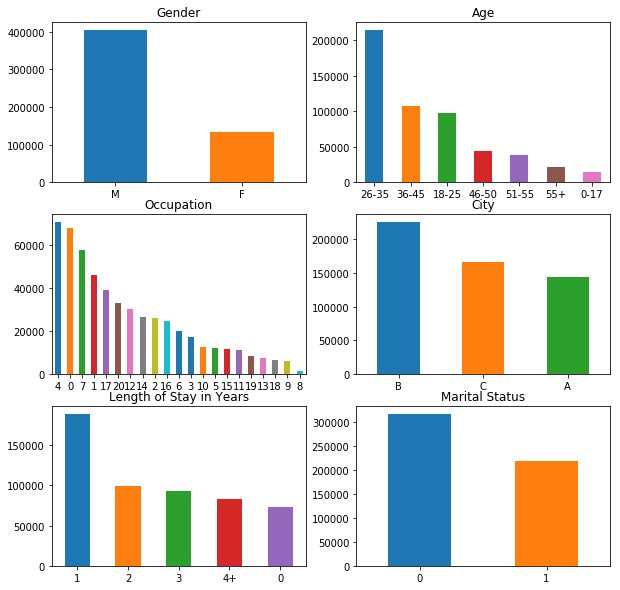

In [54]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
ax = df['Gender'].value_counts().plot(kind='bar',rot=0,title='Gender')

plt.subplot(3,2,2)
ax = df['Age'].value_counts().plot(kind='bar',rot=0,title='Age')

plt.subplot(3,2,3)
ax = df['Occupation'].value_counts().plot(kind='bar',rot=0,title='Occupation')

plt.subplot(3,2,4)
ax = df['City_Category'].value_counts().plot(kind='bar',rot=0,title='City')

plt.subplot(3,2,5)
ax = df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',rot=0,title='Length of Stay in Years')

plt.subplot(3,2,6)
ax = df['Marital_Status'].value_counts().plot(kind='bar',rot=0,title='Marital Status')

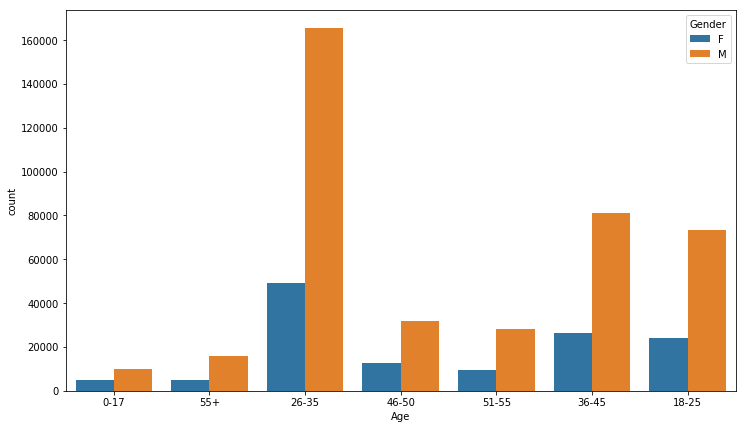

In [55]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender']);

In [56]:
df['Gender_Marital_Status'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['Gender_Marital_Status'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


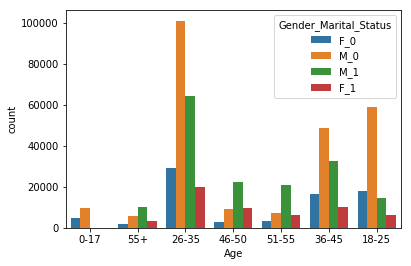

In [57]:
sns.countplot(df['Age'],hue=df['Gender_Marital_Status']);

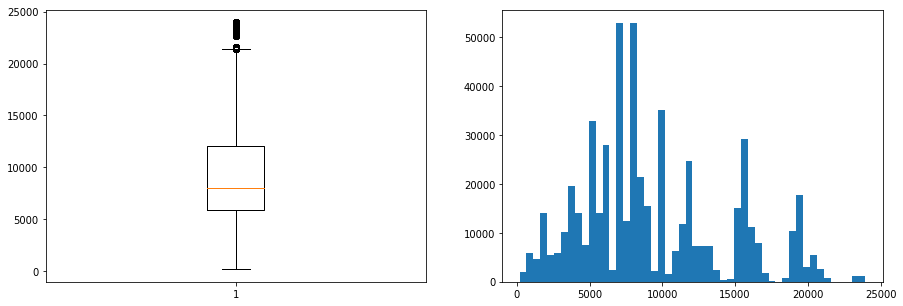

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df['Purchase'])
plt.subplot(1,2,2)
plt.hist(df['Purchase'], bins=50);

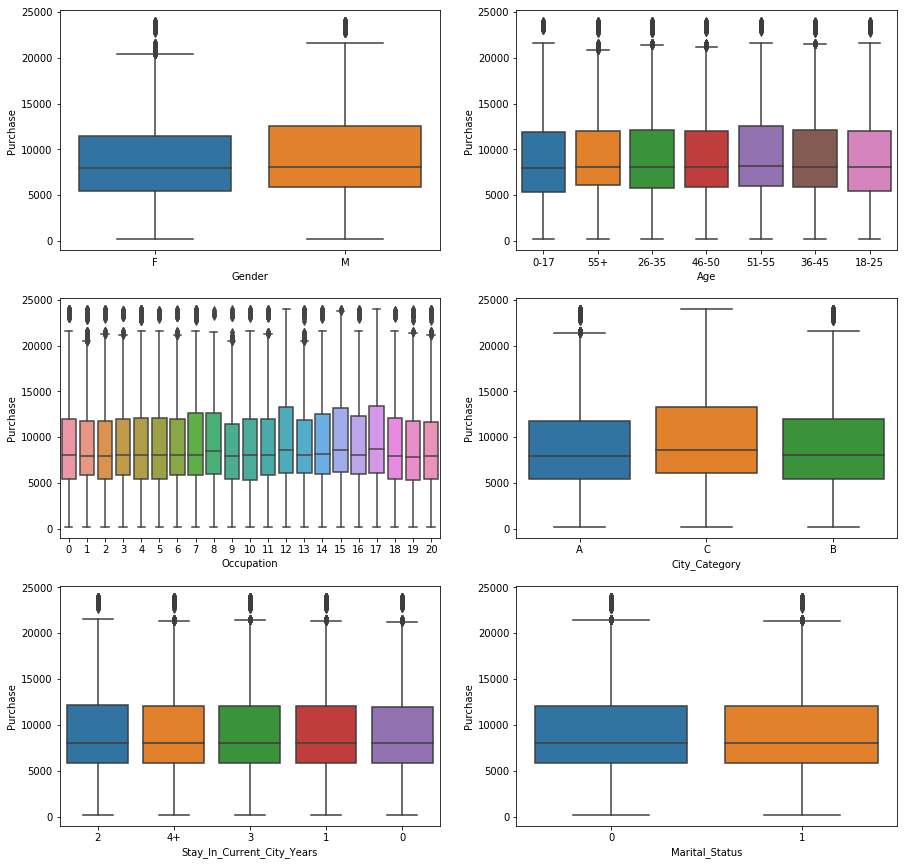

In [59]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

plt.subplot(3,2,2)
sns.boxplot(x = 'Age', y = 'Purchase', data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df)

plt.subplot(3,2,4)
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df)

plt.subplot(3,2,6)
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df);

In [66]:
all_females = df[df['Gender'] == 'F']
all_males = df[df['Gender'] == 'M']

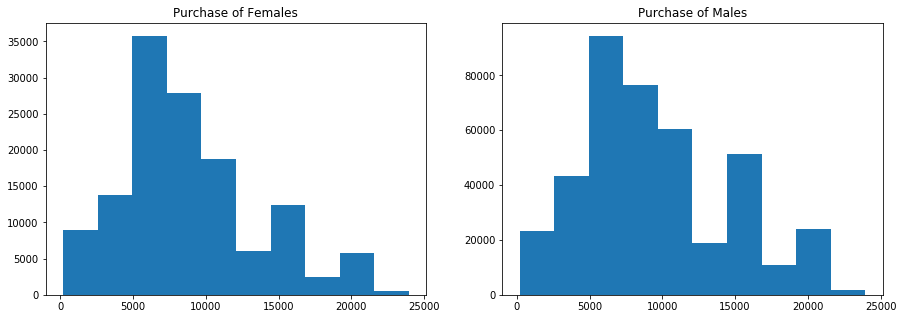

The mean purchase of females: $8809.76
The mean purchase of males: $9504.77
Purchase based on Gender T-test: Ttest_indResult(statistic=-45.67264701908008, pvalue=0.0)


In [67]:
from scipy.stats import ttest_ind
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_females['Purchase'])
plt.title('Purchase of Females')

plt.subplot(1,2,2)
plt.hist(all_males['Purchase'])
plt.title('Purchase of Males')
plt.show()

print("The mean purchase of females: ${0:.2f}".format(np.mean(all_females['Purchase'])))
print("The mean purchase of males: ${0:.2f}".format(np.mean(all_males['Purchase'])))
print("Purchase based on Gender T-test:", ttest_ind(all_females['Purchase'], all_males['Purchase'], equal_var=False))

In [68]:
all_married = df[df['Marital_Status'] == 1]
all_single = df[df['Marital_Status'] == 0]

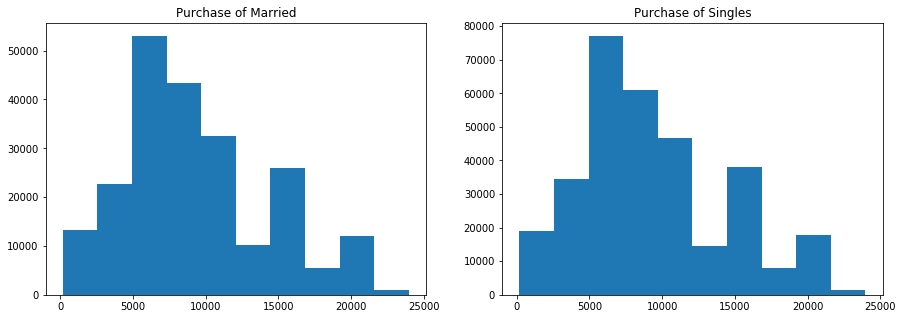

The mean purchase of married: $9334.63
The mean purchase of singles: $9333.33
Purchase based on Marital Status T-test: Ttest_indResult(statistic=0.09463132715737395, pvalue=0.9246077060850849)


In [70]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(all_married['Purchase'])
plt.title('Purchase of Married')

plt.subplot(1,2,2)
plt.hist(all_single['Purchase'])
plt.title('Purchase of Singles')
plt.show()

print("The mean purchase of married: ${0:.2f}".format(np.mean(all_married['Purchase'])))
print("The mean purchase of singles: ${0:.2f}".format(np.mean(all_single['Purchase'])))
print("Purchase based on Marital Status T-test:", ttest_ind(all_married['Purchase'], all_single['Purchase'], equal_var=False))

In [14]:
df['Stay_In_Current_City_Years'].replace({'4+':'4'}, inplace=True)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

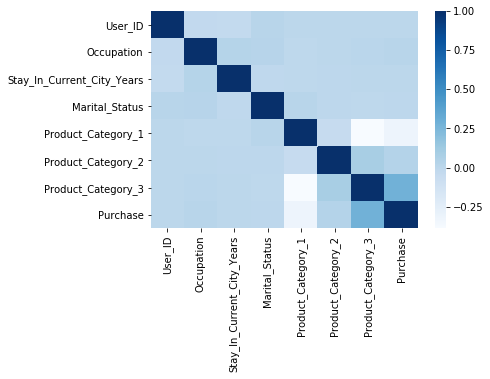

In [15]:
sns.heatmap(df.corr(),cmap='Blues');

In [16]:
df = pd.get_dummies(df, columns=['Gender','City_Category','Age',
                                 'Occupation','Product_Category_1',
                                 'Product_Category_2','Product_Category_3'])

df = df.drop(columns=['Product_ID','User_ID','Gender_Marital_Status'])

In [17]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [18]:
X = df.drop(columns=['Purchase'])
y = df.Purchase

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [20]:
# Ridge regression
start_time = time.time()

ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7668230533599854 seconds ---


In [21]:
start_time = time.time()

print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6390158638150172
0.6393506863482968
--- 0.6732273101806641 seconds ---


In [22]:
predictions = ridgeregr.predict(X_test)

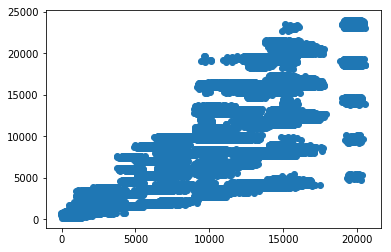

In [23]:
plt.scatter(x=predictions,y=y_test);

In [24]:
# Lasso Regression
start_time = time.time()

lasso = linear_model.Lasso(alpha=100)
lasso.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.4090189933776855 seconds ---


In [25]:
start_time = time.time()

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.43374860282340233
0.431507203322286
--- 0.620905876159668 seconds ---


In [26]:
# Decision trees
from sklearn import tree

start_time = time.time()

decision_tree = tree.DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.9154245853424072 seconds ---


In [27]:
start_time = time.time()

print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6246638766736397
0.6151640739885689
--- 0.5291006565093994 seconds ---


In [28]:
predictions = decision_tree.predict(X_test)

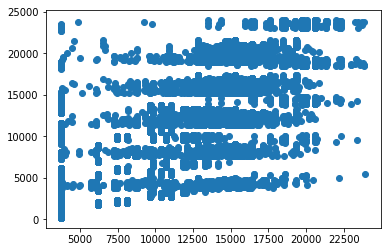

In [29]:
plt.scatter(x=predictions,y=y_test);

In [30]:
# Random Forest
from sklearn import ensemble

start_time = time.time()

rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 36.54008436203003 seconds ---


In [31]:
start_time = time.time()

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.7858150070897385
0.6114759895540636
--- 2.743821859359741 seconds ---


In [32]:
# Gradient Boosting
start_time = time.time()

params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 203.4212362766266 seconds ---


In [33]:
start_time = time.time()

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

0.6459202075125856
0.6456159397582408
--- 6.9338061809539795 seconds ---


In [34]:
# Set up and run PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=15) 
pca.fit(X)
X_pca = pca.transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=15)

In [36]:
# Ridge regression with PCA
ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))

0.3243883035933165
0.3238641641099036


In [38]:
# Lasso regression with PCA
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.32438528432500524
0.32387304733268163


In [40]:
# Decision tree with PCA
decision_tree = tree.DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

0.5013330490511405
0.4798877747653388


In [42]:
# Random forest with PCA
rfr = ensemble.RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.7729069359413377
0.5826260126068615


In [44]:
# Gradient boosting with PCA
params = {'n_estimators': 500,
          'max_depth': 2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.4321476789512385
0.4275506633089569
